In [1]:
# load in the usual Python tools:
import os
import glob
import pickle
import re

# Our numerical workhorses
import numpy as np
import pandas as pd

# Import the project utils
import sys
sys.path.insert(0, '../')
import NB_sortseq_utils as utils

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Seaborn, useful for graphics
import seaborn as sns

sns.set_palette("deep", color_codes=True)
utils.set_plotting_style1()
%matplotlib inline

We first need to load in all the processed Sort-Seq summary files:

In [2]:
datadir = '../sortseq/*/'
files = glob.glob(datadir+'*_summary.csv')

df = pd.DataFrame()

for f in enumerate(files):
    df_temp = pd.DataFrame()
    df_temp = pd.read_csv(f[1])
    # append data to df
    df = df.append(df_temp)

We can then take a look at what Sort-Seq experiments are available to plot:

In [13]:
grouped_df = df[['promoter','strain','media', 'condition', 'date']].copy()
grouped_df = grouped_df.groupby(['promoter','strain','media','condition', 'date'])

print('(promoter, strain, growth media, condition, date)')
print('------------------------------------')
for key, item in grouped_df:
    print(key)

(promoter, strain, growth media, condition, date)
------------------------------------
('dgoR', 'JK10', 'EZrichgalactonate', '500cAMP', 20160921)
('dgoR', 'JK10', 'EZrichglucose', '0cAMP', 20160921)
('dgoR', 'JK10', 'M9galactonate', 'na', 20160920)
('dgoR', 'MG1655', 'M9galactonate', 'na', 20160707)
('dgoR', 'MG1655', 'M9galactonate', 'na', 20160710)
('dgoR', 'MG1655', 'M9glucose', 'na', 20160707)
('dgoR', 'MG1655', 'M9glucose', 'na', 20160710)
('dgoR', 'MG1655deltadgoR', 'M9galactonate', 'na', 20160921)
('dgoR', 'MG1655deltadgoR', 'M9glucose', 'na', 20160824)
('dgoR_simplerepression', 'MG1655deltadgoR', 'M9glucose', 'na', 20170412)
('dgoR_simplerepression', 'MG1655deltadgoR_ybcN<>3*1-dgoR', 'M9glucose', 'na', 20170412)
('lacZ', 'MG1655', 'M9glucose', 'na', 2011)
('marR', 'MG1655', 'LB', 'na', 20150513)
('marR', 'MG1655', 'LB', 'na', 20150820)
('marR', 'MG1655', 'LB', 'ns', 20150820)
('marR', 'MG1655deltamarR', 'LB', 'na', 20150513)
('marR', 'MG1655deltamarRAB', 'LB', 'na', 20150513)
(

As an example, lets say we want to plot our _lacZ_ promoter data, with cells grown in M9 minimal media with 0.5% glucose (strain MG1655). We will create a new pandas dataframe to hold only this data:

In [14]:
df_forplotting = df[(df.promoter == 'yebG') & 
        (df.strain == 'MG1655') & 
        (df.media == 'M9glucose') &
        (df.condition == 'na') &
        (df.date==20170717)].copy()

Now we can plot the data. Use function 'utils.plot_data(df_forplotting, [type]).

Set [type] equal to the following:  
'expshift' for an expression shift plot.  
'infofootprint' for an information footprint plot.  
'mutrate' for a plot of mutation rate across the mutated windows.

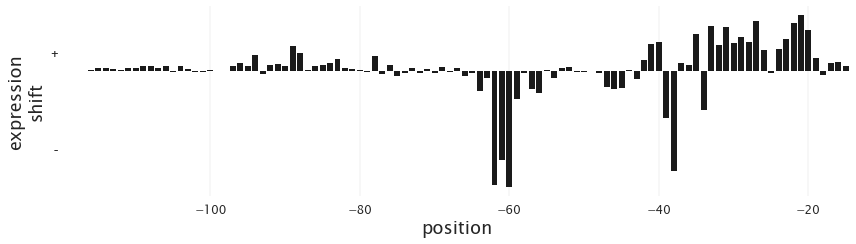

In [15]:
utils.plot_data(df_forplotting,'expshift')

# save to file
plt.tight_layout()
figname_out = '20171017_purT_expshift.pdf'
# plt.savefig(figname_out, format='pdf')

In [12]:
df_forplotting

,MI,WT_bp,bincount,condition,date,delta_bin,delta_bin_3bpavg,expshift,expshift_3bpavg,media,mutation_rate,mutregion,position,promoter,seq_files,strain
0,0.000136,G,4,na,20170412,-0.069396,-0.053334,NaN,NaN,M9glucose,0.020787,mut1,0,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
1,0.000042,A,4,na,20170412,-0.002386,0.000196,NaN,NaN,M9glucose,0.007530,mut1,1,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
2,0.000059,T,4,na,20170412,0.000178,-0.000124,NaN,NaN,M9glucose,0.015485,mut1,2,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
3,0.000060,T,4,na,20170412,-0.043418,-0.000047,NaN,NaN,M9glucose,0.015136,mut1,3,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
4,0.000048,A,4,na,20170412,0.000241,-0.000014,NaN,NaN,M9glucose,0.015752,mut1,4,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
5,0.000059,A,4,na,20170412,-0.001370,-0.000108,NaN,NaN,M9glucose,0.029067,mut1,5,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
6,0.000102,T,4,na,20170412,-0.000096,0.000029,NaN,NaN,M9glucose,0.020903,mut1,6,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
7,0.000043,T,4,na,20170412,0.003609,-0.000003,NaN,NaN,M9glucose,0.021586,mut1,7,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
8,0.000053,C,4,na,20170412,-0.000159,0.000101,NaN,NaN,M9glucose,0.022161,mut1,8,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
9,0.000081,C,4,na,20170412,-0.024554,-0.060912,NaN,NaN,M9glucose,0.024802,mut1,9,yebG,['data/20170402_MG1655_yebG_mut1.bin1.prequal2...,MG1655
